<a href="https://colab.research.google.com/github/shivangtripathi/ml_lab/blob/main/ml4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digits = load_digits()
#X = digits.data
X = pd.DataFrame(data=digits.data)
Y = digits.target


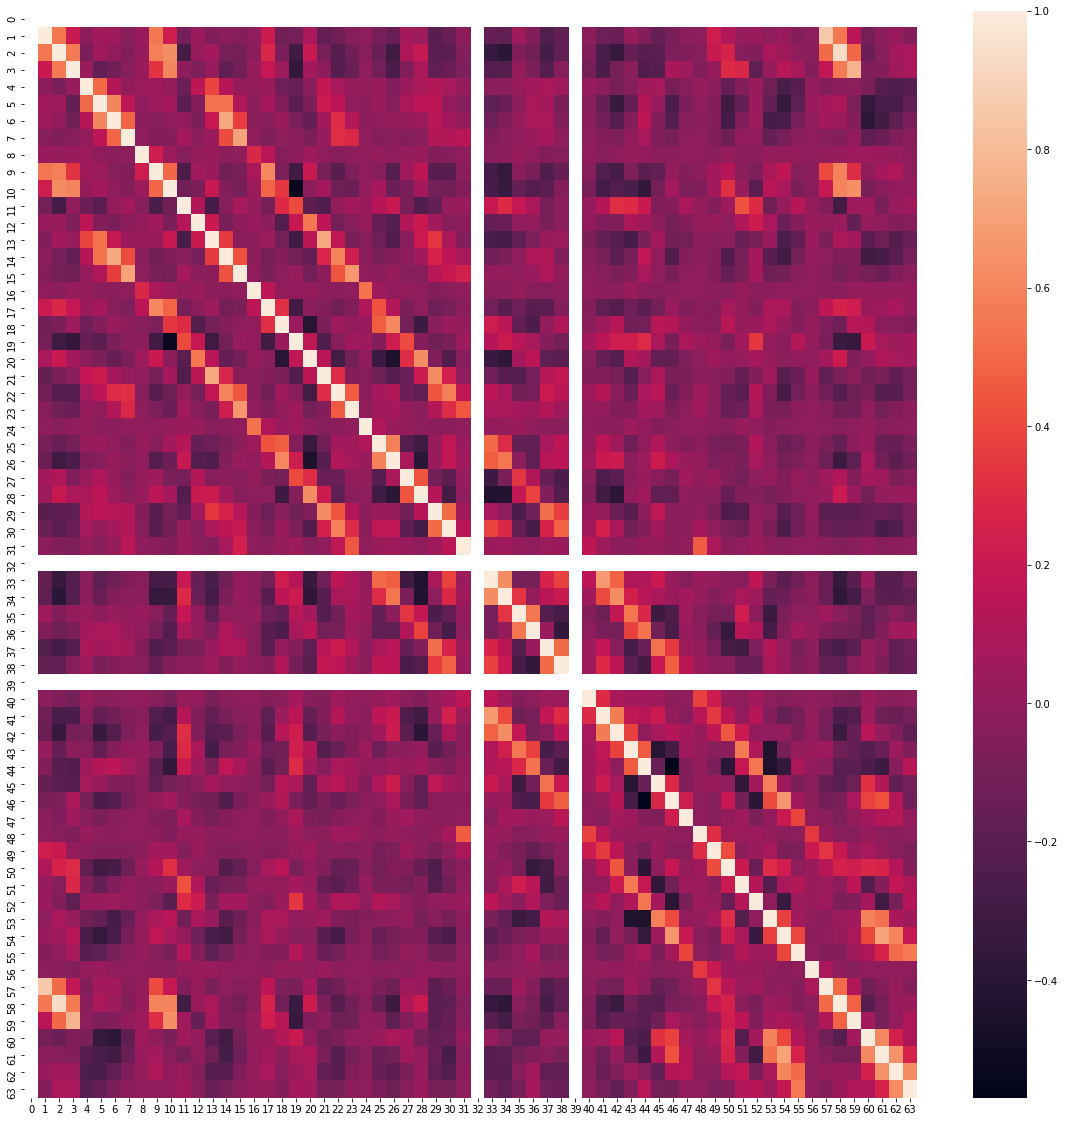

In [28]:
import seaborn as sns
plt.figure(figsize=(20,20))
p = sns.heatmap(X.corr())

In [30]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)


In [33]:
features = X_scaled.T
cov_matrix = np.cov(features)
print(cov_matrix)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.33501649 -0.33501649 -0.33501649 ... -0.33501649 -0.33501649
  -0.33501649]
 [-0.04308102 -1.09493684 -1.09493684 ... -0.88456568 -0.67419451
   1.00877481]
 ...
 [-1.14664746  0.54856067  1.56568555 ... -0.12952258  0.8876023
   0.8876023 ]
 [-0.5056698  -0.5056698   1.6951369  ... -0.5056698  -0.5056698
  -0.26113572]
 [-0.19600752 -0.19600752 -0.19600752 ... -0.19600752 -0.19600752
  -0.19600752]]


In [68]:
values,vectors = np.linalg.eig(cov_matrix)
print(len(vectors))

64


In [64]:
explained_variances = []
for i in range(len(values)):
  explained_variances.append(values[i]/np.sum(values))

print(explained_variances)

[0.12033916097734898, 0.09561054403097898, 0.0844441489262453, 0.06498407907524166, 0.04860154875966399, 0.042141198692719505, 0.03942082803567379, 0.03389380924638318, 0.029982210116252198, 0.029320025512522215, 0.027818054635503346, 0.02577055092582008, 0.022753033157642558, 0.022271797395143473, 0.021652294318492367, 0.019141666064421355, 0.017755470851681925, 0.016380692742844254, 0.015964601688623382, 0.014891911870878252, 0.013479695658179391, 0.0127193137023476, 0.011658373505919513, 0.010576465985363173, 0.009753159471981082, 0.009445589897319969, 0.00863013826970722, 0.008366428536685157, 0.007976932484112407, 0.007464713709260606, 0.0072558215137027435, 0.0069191124548118104, 0.0065390853557261526, 0.006407925738459876, 0.00591384111722343, 0.005711624052235237, 0.005236368034166366, 0.004818075864451421, 0.0008253509448180407, 0.004537192598584493, 0.001036957301557179, 0.0042316275323278085, 0.004060530699790378, 0.00397084808275827, 0.0012510074249730148, 0.001351184113370

Text(0.5, 0, 'Principal Components')

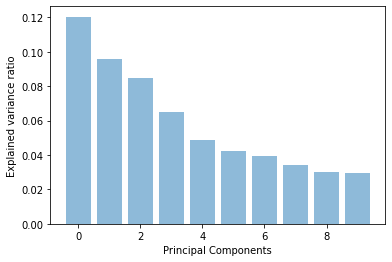

In [66]:
plt.figure(figsize=(6,4))
plt.bar(range(10),explained_variances[:10],alpha=0.5,align='center',label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal Components')

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [70]:
projected_1 = X_scaled.dot(vectors.T[0])
projected_2 = X_scaled.dot(vectors.T[1])
projected_3 = X_scaled.dot(vectors.T[2])
projected_4 = X_scaled.dot(vectors.T[3])
projected_5 = X_scaled.dot(vectors.T[4])
res = pd.DataFrame(projected_1,columns=['PC1'])
res['PC2'] = projected_2
res['PC3'] = projected_3
res['PC4'] = projected_4
res['PC5'] = projected_5
res['Y'] = Y
res

,PC1,PC2,PC3,PC4,PC5,Y
0,-1.914214,0.954502,-3.946035,-2.028723,-0.267173,0
1,-0.588980,-0.924636,3.924755,1.779850,-0.993430,1
2,-1.302039,0.317189,3.023333,2.043376,-2.081155,2
3,3.020770,0.868772,-0.801744,2.187039,-0.556813,3
4,-4.528949,1.093480,0.973121,1.419510,-1.715106,4
...,...,...,...,...,...,...
1792,-0.104331,-0.255024,-3.765861,1.947006,-0.190094,9
1793,-2.423234,1.429611,-3.045245,-2.632089,-0.822902,0
1794,-1.022596,0.147911,2.469974,0.620307,-0.972043,8
1795,-1.076055,0.380906,-2.455487,1.312013,0.253533,9


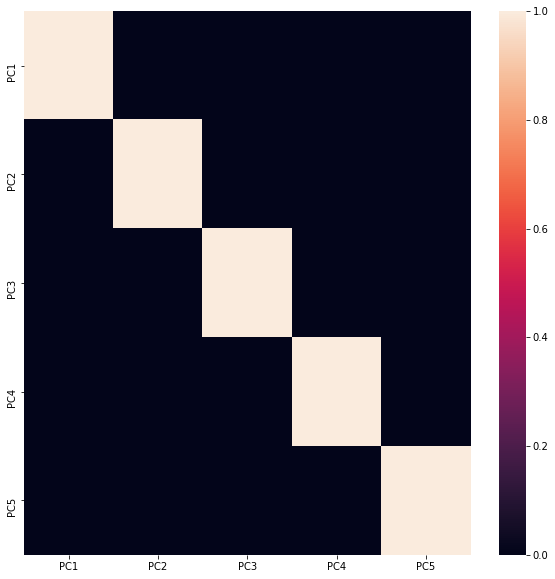

In [71]:
plt.figure(figsize=(10,10))
X = res[['PC1','PC2','PC3','PC4','PC5']]
p = sns.heatmap(X.corr())

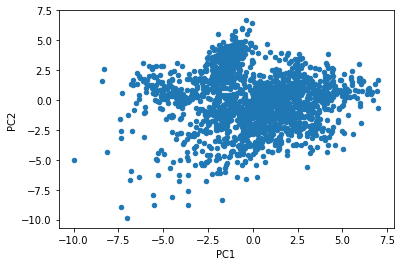

In [58]:
res.plot(kind="scatter",x="PC1",y="PC2")